## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

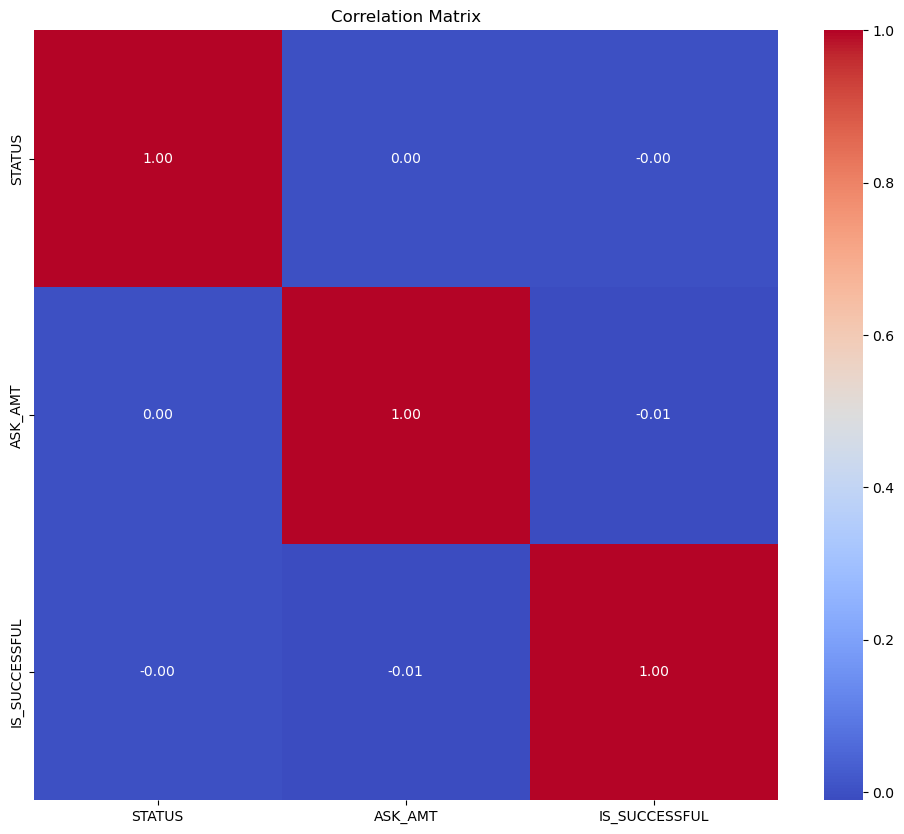

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your dataframe with target 'IS_SUCCESSFUL'
# Select only numeric columns for correlation calculation
numeric_df = application_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
# Include all object type or categorical columns that may have been missed initially
categorical_cols = application_df.select_dtypes(include=['object']).columns.tolist()
application_df = pd.get_dummies(application_df, columns=categorical_cols, drop_first=True, dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Apply Initial Feature Filtering Using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Convert X_train back to a DataFrame to access column names
X_train_df = pd.DataFrame(X_train, columns=application_df.drop(columns=["IS_SUCCESSFUL"]).columns[:X_train.shape[1]])

# Compute feature importances using the X_train DataFrame columns
feature_importance = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the top features for inspection
print("Random Forest Feature Importances:")
print(feature_importance.head(10))

# Define a threshold (e.g., 0.01) to drop low-importance features
# Define a threshold for low importance features
importance_threshold = 0.01
low_importance_features = feature_importance[feature_importance['Importance'] < importance_threshold]['Feature'].tolist()

# Drop these features from both training and testing DataFrames if they exist
X_train_df = X_train_df.drop(columns=[col for col in low_importance_features if col in X_train_df.columns], errors='ignore')
X_test_df = pd.DataFrame(X_test, columns=application_df.drop(columns=["IS_SUCCESSFUL"]).columns[:X_test.shape[1]])
X_test_df = X_test_df.drop(columns=[col for col in low_importance_features if col in X_test_df.columns], errors='ignore')

# Convert back to numpy arrays
X_train = X_train_df.values
X_test = X_test_df.values



Random Forest Feature Importances:
                    Feature  Importance
1                   ASK_AMT    0.403571
11  AFFILIATION_Independent    0.250533
32       ORGANIZATION_Trust    0.042649
19     CLASSIFICATION_C2100    0.027313
6       APPLICATION_TYPE_T5    0.025029
2      APPLICATION_TYPE_T10    0.023388
18     CLASSIFICATION_C2000    0.019199
3      APPLICATION_TYPE_T19    0.018928
5       APPLICATION_TYPE_T4    0.015564
24     CLASSIFICATION_C7000    0.015544


In [13]:
# ============================================================
# Additional Filtering Using Mutual Information (Adjusted Threshold)
# ============================================================
from sklearn.feature_selection import mutual_info_classif

print("Calculating mutual information scores...")
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_train_df.columns)

# Display the mutual information scores
print("Mutual Information Scores:")
print(mi_scores_series.sort_values(ascending=False))

# Lower the threshold to be less aggressive (e.g., 0.005 instead of 0.01)
mi_threshold = 0.001
selected_features = mi_scores_series[mi_scores_series > mi_threshold].index.tolist()
print("Selected features based on mutual information (threshold=0.005):", selected_features)

# Retain only the selected features in the training and testing sets
X_train = X_train_df[selected_features].values
X_test = X_test_df[selected_features].values


Calculating mutual information scores...
Mutual Information Scores:
AFFILIATION_Independent    0.073298
ORGANIZATION_Trust         0.012341
CLASSIFICATION_C2100       0.011578
CLASSIFICATION_C7000       0.010074
APPLICATION_TYPE_T4        0.009606
APPLICATION_TYPE_T19       0.009193
APPLICATION_TYPE_T10       0.007287
ASK_AMT                    0.006046
APPLICATION_TYPE_T5        0.005254
USE_CASE_Preservation      0.001637
CLASSIFICATION_C1200       0.000316
APPLICATION_TYPE_T3        0.000000
APPLICATION_TYPE_T6        0.000000
CLASSIFICATION_C2000       0.000000
USE_CASE_ProductDev        0.000000
dtype: float64
Selected features based on mutual information (threshold=0.005): ['ASK_AMT', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'AFFILIATION_Independent', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C7000', 'USE_CASE_Preservation', 'ORGANIZATION_Trust']


In [14]:
# Optional: Apply PCA for Dimensionality Reduction (if desired)
from sklearn.decomposition import PCA

n_components = min(X_train.shape[1], 15)  # Adjust so PCA does not exceed available features
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Step 9: Scale Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
nn = tf.keras.models.Sequential()

# Adjust the number of neurons given fewer input features
nn.add(Dense(128, activation='swish', input_dim=X_train_scaled.shape[1]))
nn.add(BatchNormalization())
nn.add(Dropout(0.05))  # reduced dropout

nn.add(Dense(64, activation='swish'))
nn.add(BatchNormalization())
nn.add(Dropout(0.05))

nn.add(Dense(32, activation='swish'))
nn.add(BatchNormalization())

# Output layer remains unchanged
nn.add(Dense(1, activation='sigmoid'))

nn.summary()

# Compile with a tuned optimizer
nn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


# Check model structure
nn.summary()

c:\Users\olive\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,225 (47.75 KB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,225 (47.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
# Compile the model
nn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Create a ModelCheckpoint callback to save weights (adjust frequency as needed) ###
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights_epoch_{epoch:02d}.h5", save_freq='epoch', verbose=1)

# Implement Callbacks for Optimization
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("optimized_weights.h5", monitor='val_loss', save_best_only=True, verbose=1)

In [17]:
# Train the Neural Network with More Epochs
history = nn.fit(
    X_train_scaled, y_train,
    epochs=100,  # Increased epochs for better convergence
    batch_size=16,  # Adjusted batch size for better gradient updates
    validation_data=(X_test_scaled, y_test),
    callbacks=[lr_reducer, early_stopper, checkpoint]
)

Epoch 1/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - loss: 0.6265
Epoch 1: val_loss improved from inf to 0.58120, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6817 - loss: 0.6264 - val_accuracy: 0.7106 - val_loss: 0.5812 - learning_rate: 5.0000e-04
Epoch 2/100
1597/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.5953
Epoch 2: val_loss did not improve from 0.58120
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7063 - loss: 0.5953 - val_accuracy: 0.7124 - val_loss: 0.5812 - learning_rate: 5.0000e-04
Epoch 3/100
1580/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.5843
Epoch 3: val_loss improved from 0.58120 to 0.57757, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7157 - loss: 0.5844 - val_accuracy: 0.7131 - val_loss: 0.5776 - learning_rate: 5.0000e-04
Epoch 4/100
1604/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7093 - loss: 0.5905
Epoch 4: val_loss did not improve from 0.57757
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7093 - loss: 0.5905 - val_accuracy: 0.7115 - val_loss: 0.5822 - learning_rate: 5.0000e-04
Epoch 5/100
1607/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7078 - loss: 0.5909
Epoch 5: val_loss did not improve from 0.57757
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7078 - loss: 0.5909 - val_accuracy: 0.7113 - val_loss: 0.5780 - learning_rate: 5.0000e-04
Epoch 6/100
1600/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7140 - loss: 0.5821
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 6: val_loss did not improve from 0.57757
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7140 - loss: 0.58

1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7078 - loss: 0.5867 - val_accuracy: 0.7114 - val_loss: 0.5760 - learning_rate: 2.5000e-04
Epoch 8/100
1599/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.5833
Epoch 8: val_loss did not improve from 0.57597
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7149 - loss: 0.5833 - val_accuracy: 0.7144 - val_loss: 0.5791 - learning_rate: 2.5000e-04
Epoch 9/100
1582/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7168 - loss: 0.5791
Epoch 9: val_loss did not improve from 0.57597
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7168 - loss: 0.5791 - val_accuracy: 0.7141 - val_loss: 0.5798 - learning_rate: 2.5000e-04
Epoch 10/100
1594/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: 0.5862
Epoch 10: val_loss improved from 0.57597 to 0.57524, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7104 - loss: 0.5861 - val_accuracy: 0.7127 - val_loss: 0.5752 - learning_rate: 2.5000e-04
Epoch 11/100
1599/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7148 - loss: 0.5810
Epoch 11: val_loss did not improve from 0.57524
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7148 - loss: 0.5810 - val_accuracy: 0.7151 - val_loss: 0.5766 - learning_rate: 2.5000e-04
Epoch 12/100
1591/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7116 - loss: 0.5838
Epoch 12: val_loss improved from 0.57524 to 0.57374, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7116 - loss: 0.5838 - val_accuracy: 0.7128 - val_loss: 0.5737 - learning_rate: 2.5000e-04
Epoch 13/100
1598/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7084 - loss: 0.5851
Epoch 13: val_loss did not improve from 0.57374
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7085 - loss: 0.5851 - val_accuracy: 0.7143 - val_loss: 0.5760 - learning_rate: 2.5000e-04
Epoch 14/100
1597/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7107 - loss: 0.5842
Epoch 14: val_loss improved from 0.57374 to 0.57246, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7107 - loss: 0.5842 - val_accuracy: 0.7151 - val_loss: 0.5725 - learning_rate: 2.5000e-04
Epoch 15/100
1607/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7191 - loss: 0.5769
Epoch 15: val_loss did not improve from 0.57246
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7190 - loss: 0.5769 - val_accuracy: 0.7158 - val_loss: 0.5789 - learning_rate: 2.5000e-04
Epoch 16/100
1588/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7131 - loss: 0.5806
Epoch 16: val_loss did not improve from 0.57246
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7131 - loss: 0.5806 - val_accuracy: 0.7137 - val_loss: 0.5734 - learning_rate: 2.5000e-04
Epoch 17/100
1583/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7224 - loss: 0.5746
Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 17: val_loss did not improve from 0.57246
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7223 - los

1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7162 - loss: 0.5760 - val_accuracy: 0.7145 - val_loss: 0.5719 - learning_rate: 6.2500e-05
Epoch 23/100
1598/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 0.5749
Epoch 23: val_loss did not improve from 0.57190
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7199 - loss: 0.5749 - val_accuracy: 0.7159 - val_loss: 0.5725 - learning_rate: 6.2500e-05
Epoch 24/100
1583/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7126 - loss: 0.5818
Epoch 24: val_loss did not improve from 0.57190
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7127 - loss: 0.5818 - val_accuracy: 0.7148 - val_loss: 0.5751 - learning_rate: 6.2500e-05
Epoch 25/100
1598/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.5732
Epoch 25: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 25: val_loss did not improve from 0.57190
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7210 - los

1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7115 - loss: 0.5849 - val_accuracy: 0.7157 - val_loss: 0.5718 - learning_rate: 3.1250e-05
Epoch 27/100
1599/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7137 - loss: 0.5791
Epoch 27: val_loss did not improve from 0.57184
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7137 - loss: 0.5791 - val_accuracy: 0.7151 - val_loss: 0.5755 - learning_rate: 3.1250e-05
Epoch 28/100
1603/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7135 - loss: 0.5797
Epoch 28: val_loss improved from 0.57184 to 0.57166, saving model to optimized_weights.h5


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7135 - loss: 0.5797 - val_accuracy: 0.7151 - val_loss: 0.5717 - learning_rate: 3.1250e-05
Epoch 29/100
1580/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7239 - loss: 0.5738
Epoch 29: val_loss did not improve from 0.57166
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7238 - loss: 0.5739 - val_accuracy: 0.7151 - val_loss: 0.5766 - learning_rate: 3.1250e-05
Epoch 30/100
1602/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 0.5797
Epoch 30: val_loss did not improve from 0.57166
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7187 - loss: 0.5797 - val_accuracy: 0.7152 - val_loss: 0.5749 - learning_rate: 3.1250e-05
Epoch 31/100
1605/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 0.5809
Epoch 31: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 31: val_loss did not improve from 0.57166
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7144 - lo

In [22]:
# Evaluate Optimized Model
final_loss, final_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Optimized Model -> Loss: {final_loss}, Accuracy: {final_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7151 - loss: 0.5717
Optimized Model -> Loss: 0.5716601014137268, Accuracy: 0.7151020169258118


In [23]:
# Test an Alternative Model: Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train Gradient Boosting Model
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)

# Make Predictions
gbc_predictions = gbc.predict(X_test_scaled)

# Evaluate Gradient Boosting Model Accuracy
gbc_accuracy = accuracy_score(y_test, gbc_predictions)
print(f"Gradient Boosting Model Accuracy: {gbc_accuracy}")


Gradient Boosting Model Accuracy: 0.7160349854227406


In [24]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimized.h5")

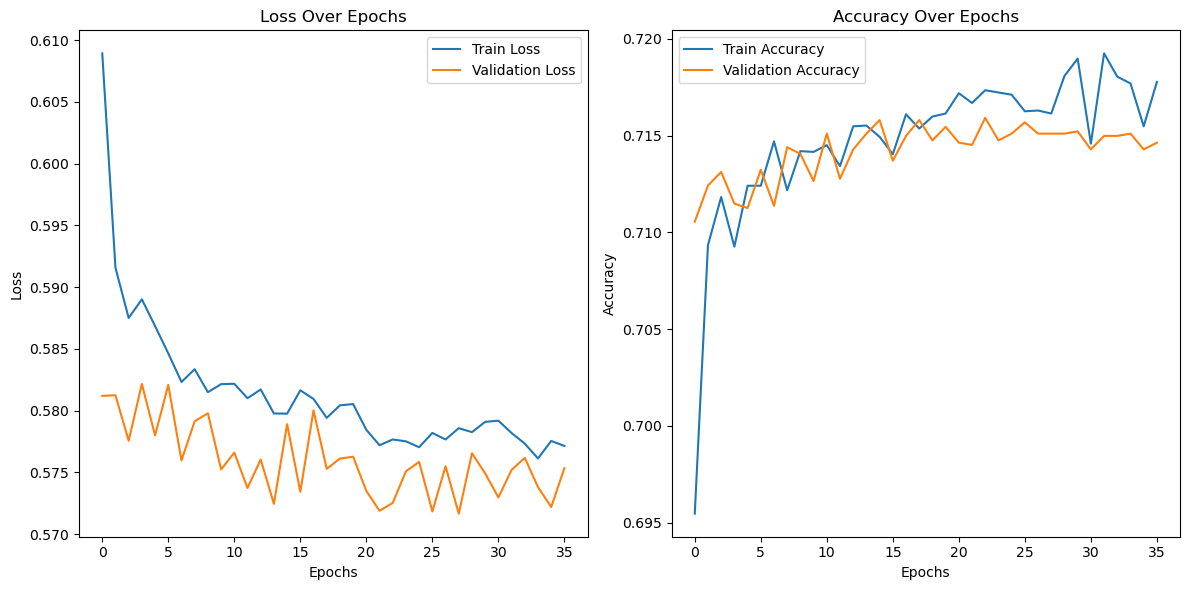

<Figure size 640x480 with 0 Axes>

In [25]:
# Visualize the training history on a curve
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    

    
# plot the training loss and accuracy
plot_training_history(history)
# Save the plot as an image file
plt.savefig("training_history.png")